# Mid-term exam NLP


## Nguyen Van Quan


### 20010748

In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from sklearn.model_selection import train_test_split
import os

#### **Preprocessing**

In [2]:
%cd /content/drive/MyDrive/University/Term8/NLP/Mid-term/Mid-term

/content/drive/MyDrive/University/Term8/NLP/Mid-term/Mid-term


In [3]:
os.listdir()

['kaggle', 'Mid-term-sentiment140.ipynb', 'Mid-term-imdb-50000-reviews.ipynb']

IMDB Dataset of 50K Movie Reviews

Read the dataset

In [4]:
import numpy as np
import pandas as pd
df=pd.read_csv("kaggle/input/training.1600000.processed.noemoticon.csv",encoding ="latin1",header =None)

In [5]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df = df.iloc[:,[0,5]].rename(columns={0 : 'sentiment', 5 : 'review'})

In [7]:
df.head()

,sentiment,review
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
len_ = 5000

In [9]:
df = df.sample(len_,random_state=12)

##### 1. LOWER CASING

In [10]:
df['review']=df['review'].str.lower()
df['review']

889171                         @syhinfo thanks for the info 
1549553                                  @reevecarney voted 
1554662    ugh cant vote! but im totally rooting for twil...
459019     they're moving cattle across the road and all ...
939375     just made my first connection in honolulu/hawa...
                                 ...                        
1096802    watching pearl harbour with @saragovea and dri...
1058877    @dougiemcfly  can you check this picture out p...
1176580    listening to this new young dro mixtape i jus ...
343110     i bought some korean-made skincare masks. i ca...
1165560    @deragonflyz ok, that is something i srsly nee...
Name: review, Length: 5000, dtype: object

##### 2. REMOVE HTML TAGS:

In [11]:
#Removing HTML Tags
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'' ,text)
df['review']=df['review'].apply(remove_html_tags)

In [12]:
df['review']

889171                         @syhinfo thanks for the info 
1549553                                  @reevecarney voted 
1554662    ugh cant vote! but im totally rooting for twil...
459019     they're moving cattle across the road and all ...
939375     just made my first connection in honolulu/hawa...
                                 ...                        
1096802    watching pearl harbour with @saragovea and dri...
1058877    @dougiemcfly  can you check this picture out p...
1176580    listening to this new young dro mixtape i jus ...
343110     i bought some korean-made skincare masks. i ca...
1165560    @deragonflyz ok, that is something i srsly nee...
Name: review, Length: 5000, dtype: object

##### 3. REMOVE URLS:

In [13]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)
df['review']=df['review'].apply(remove_url)

In [14]:
df['review']

889171                         @syhinfo thanks for the info 
1549553                                  @reevecarney voted 
1554662    ugh cant vote! but im totally rooting for twil...
459019     they're moving cattle across the road and all ...
939375     just made my first connection in honolulu/hawa...
                                 ...                        
1096802    watching pearl harbour with @saragovea and dri...
1058877    @dougiemcfly  can you check this picture out p...
1176580    listening to this new young dro mixtape i jus ...
343110     i bought some korean-made skincare masks. i ca...
1165560    @deragonflyz ok, that is something i srsly nee...
Name: review, Length: 5000, dtype: object

##### 4. REMOVE PUNCTUATIONS

In [15]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('','',string.punctuation))
df['review']=df['review'].apply(remove_punctuation)

In [16]:
df['review']

889171                          syhinfo thanks for the info 
1549553                                   reevecarney voted 
1554662    ugh cant vote but im totally rooting for twili...
459019     theyre moving cattle across the road and all i...
939375     just made my first connection in honoluluhawai...
                                 ...                        
1096802    watching pearl harbour with saragovea and drin...
1058877    dougiemcfly  can you check this picture out pl...
1176580    listening to this new young dro mixtape i jus ...
343110     i bought some koreanmade skincare masks i cant...
1165560    deragonflyz ok that is something i srsly need ...
Name: review, Length: 5000, dtype: object

##### 5. CHAT WORD TREATMENT

In [17]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laughter",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "IDC": "I don’t care",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing",
}

In [18]:
def chat_conversion(text):
    new_text=[]
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)
df['review']= df['review'].apply(chat_conversion)

In [19]:
df['review']

889171                           syhinfo thanks for the info
1549553                                    reevecarney voted
1554662    ugh cant vote but im totally rooting for twili...
459019     theyre moving cattle across the road and all i...
939375     just made my first connection in honoluluhawai...
                                 ...                        
1096802    watching pearl harbour with saragovea and drin...
1058877    dougiemcfly can you check this picture out ple...
1176580    listening to this new young dro mixtape i jus ...
343110     i bought some koreanmade skincare masks i cant...
1165560    deragonflyz ok that is something i srsly need ...
Name: review, Length: 5000, dtype: object

##### 6. REMOVING STOP WORDS

In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
def stopwords_removal(text):
    new_text=[]
    for word in text.split():
        if word in stop_words:
            new_text.append('')
        else:
            new_text.append(word)
    x=new_text[:]
    new_text.clear()
    return " ".join(x)
df['review']= df['review'].apply(stopwords_removal)

In [22]:
df.head()

,sentiment,review
889171,4,syhinfo thanks info
1549553,4,reevecarney voted
1554662,4,ugh cant vote im totally rooting twilight demi
459019,0,theyre moving cattle across road smell cow
939375,4,made first connection honoluluhawaii via be...


##### 7. REMOVING EMOJIS

In [23]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['review']= df['review'].apply(remove_emoji)

In [24]:
df.head()

,sentiment,review
889171,4,syhinfo thanks info
1549553,4,reevecarney voted
1554662,4,ugh cant vote im totally rooting twilight demi
459019,0,theyre moving cattle across road smell cow
939375,4,made first connection honoluluhawaii via be...


##### 8. STEMMING

In [25]:
from nltk. stem.porter import PorterStemmer
def stem_words(text):
    stemmer=PorterStemmer()
    return" ".join([stemmer.stem(word) for word in text.split()])
df['review']= df['review'].apply(remove_emoji)

In [26]:
df.head()

,sentiment,review
889171,4,syhinfo thanks info
1549553,4,reevecarney voted
1554662,4,ugh cant vote im totally rooting twilight demi
459019,0,theyre moving cattle across road smell cow
939375,4,made first connection honoluluhawaii via be...


In [27]:
df['sentiment'].replace({4:1,0:0},inplace=True)

In [28]:
df.head()

,sentiment,review
889171,1,syhinfo thanks info
1549553,1,reevecarney voted
1554662,1,ugh cant vote im totally rooting twilight demi
459019,0,theyre moving cattle across road smell cow
939375,1,made first connection honoluluhawaii via be...


##### Create train and test data

**Review text**

In [29]:
#train
norm_train_reviews=df.review[:int(0.8*len_)]
#test
norm_test_reviews=df.review[int(0.8*len_):]

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature na

BOW_cv_train: (4000, 53057)
BOW_cv_test: (1000, 53057)


In [32]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (4000, 53057)
Tfidf_test: (1000, 53057)


**Labeling the sentiment text**

In [33]:
from sklearn.preprocessing import LabelBinarizer

In [34]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(df['sentiment'])
print(sentiment_data.shape)
#Spliting the sentiment data
train_sentiments=sentiment_data[:int(0.8*len_)]
test_sentiments=sentiment_data[int(0.8*len_):]
print(train_sentiments)
print(test_sentiments)

(5000, 1)
[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]
[[1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]

#### Model

##### Machine Learning Model

###### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

**Build Model and train**

In [36]:
#training the model
lr1=LogisticRegression(penalty='l2',max_iter=5000,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr1.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr2=LogisticRegression(penalty='l2',max_iter=5000,C=1,random_state=42)
lr_tfidf=lr2.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=5000, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=5000, random_state=42)


**Logistic regression model performane on test dataset**

In [37]:
#Predicting the model for bag of words
lr_bow_predict=lr1.predict(cv_test_reviews)
lr_bow_train = lr1.predict(cv_train_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr2.predict(tv_test_reviews)
lr_tfidf_train  =lr2.predict(tv_train_reviews)
print(lr_tfidf_predict)

[0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1
 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0
 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 

**Accuracy of the model**

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [39]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(train_sentiments,lr_bow_train)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(train_sentiments,lr_tfidf_train)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.99275
lr_tfidf_score : 0.99025


In [40]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.537
lr_tfidf_score : 0.54


**Print the classification report**

In [41]:
#Classification report for bag of words
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.53      0.77      0.63       513
    Negative       0.55      0.29      0.38       487

    accuracy                           0.54      1000
   macro avg       0.54      0.53      0.50      1000
weighted avg       0.54      0.54      0.51      1000

              precision    recall  f1-score   support

    Positive       0.60      0.32      0.41       513
    Negative       0.52      0.77      0.62       487

    accuracy                           0.54      1000
   macro avg       0.56      0.55      0.52      1000
weighted avg       0.56      0.54      0.52      1000



**Confusion matrix**

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Confusion Matrix BOW')

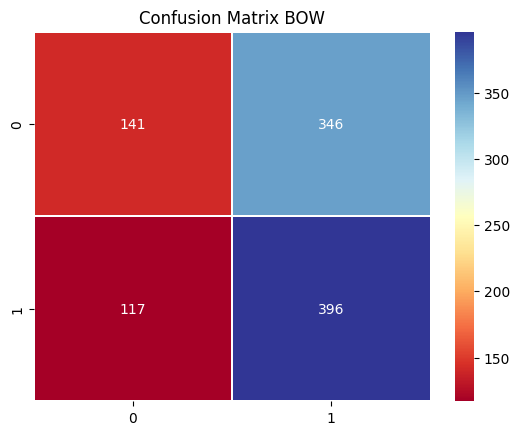

In [43]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
sns.heatmap(cm_bow,cmap="RdYlBu",annot=True,fmt='',linewidths=0.3)
plt.title("Confusion Matrix BOW")

Text(0.5, 1.0, 'Confusion Matrix TFIDF')

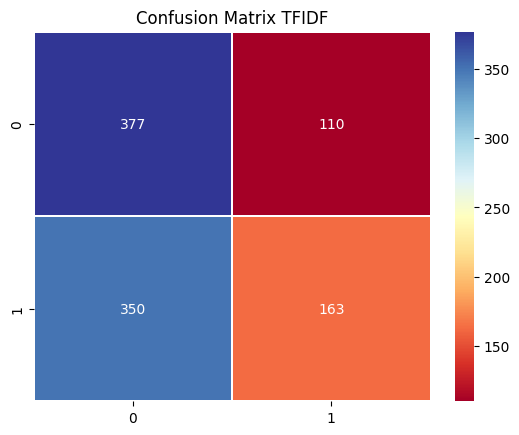

In [44]:
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
sns.heatmap(cm_tfidf,cmap="RdYlBu",annot=True,fmt='',linewidths=0.3)
plt.title("Confusion Matrix TFIDF")

###### Stochastic gradient descent

 **Stochastic gradient descent for bag of words and tfidf features**

In [45]:
from sklearn.linear_model import SGDClassifier

In [46]:
#training the linear svm
sgd1=SGDClassifier(loss='hinge',max_iter=5000,random_state=12)
#fitting the sgd for bag of words
sgd_bow=sgd1.fit(cv_train_reviews,train_sentiments)
print(sgd_bow)
#fitting the sgd for tfidf features
sgd2=SGDClassifier(loss='hinge',max_iter=5000,random_state=42)
sgd_tfidf=sgd2.fit(tv_train_reviews,train_sentiments)
print(sgd_tfidf)

SGDClassifier(max_iter=5000, random_state=12)
SGDClassifier(max_iter=5000, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Model performance on test data**

In [47]:
#Predicting the model for bag of words
sgd_bow_predict=sgd_bow.predict(cv_test_reviews)
sgd_bow_train = sgd_bow.predict(cv_train_reviews)
print(sgd_bow_predict)
#Predicting the model for tfidf features
sgd_tfidf_predict=sgd_tfidf.predict(tv_test_reviews)
sgd_tfidf_train = sgd_tfidf.predict(tv_train_reviews)
print(sgd_tfidf_predict)

[0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1
 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 

**Accuracy of the model**

In [48]:
#Accuracy score for bag of words
sgd_bow_score=accuracy_score(train_sentiments,sgd_bow_train)
print("sgd_bow_score :",sgd_bow_score)
#Accuracy score for tfidf features
sgd_tfidf_score=accuracy_score(train_sentiments,sgd_tfidf_train)
print("sgd_tfidf_score :",sgd_tfidf_score)

sgd_bow_score : 0.99275
sgd_tfidf_score : 0.99025


In [49]:
#Accuracy score for bag of words
sgd_bow_score=accuracy_score(test_sentiments,sgd_bow_predict)
print("sgd_bow_score :",sgd_bow_score)
#Accuracy score for tfidf features
sgd_tfidf_score=accuracy_score(test_sentiments,sgd_tfidf_predict)
print("sgd_tfidf_score :",sgd_tfidf_score)

sgd_bow_score : 0.534
sgd_tfidf_score : 0.538


**Print the classification report**

In [50]:
#Classification report for bag of words
sgd_bow_report=classification_report(test_sentiments,sgd_bow_predict,target_names=['Positive','Negative'])
print(sgd_bow_report)
#Classification report for tfidf features
sgd_tfidf_report=classification_report(test_sentiments,sgd_tfidf_predict,target_names=['Positive','Negative'])
print(sgd_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.53      0.80      0.64       513
    Negative       0.55      0.25      0.35       487

    accuracy                           0.53      1000
   macro avg       0.54      0.53      0.49      1000
weighted avg       0.54      0.53      0.50      1000

              precision    recall  f1-score   support

    Positive       0.59      0.32      0.41       513
    Negative       0.52      0.77      0.62       487

    accuracy                           0.54      1000
   macro avg       0.55      0.54      0.52      1000
weighted avg       0.56      0.54      0.51      1000



**Plot the confusion matrix**

Text(0.5, 1.0, 'Confusion Matrix BOW')

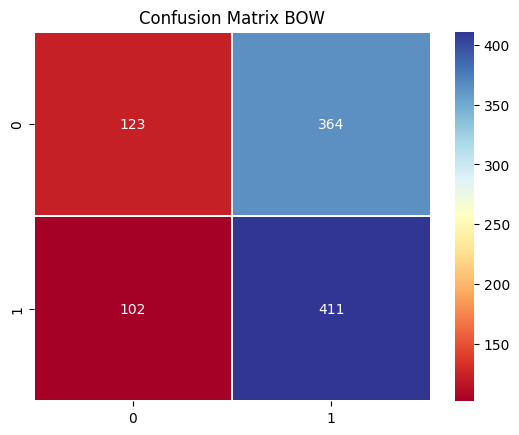

In [51]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,sgd_bow_predict,labels=[1,0])
sns.heatmap(cm_bow,cmap="RdYlBu",annot=True,fmt='',linewidths=0.3)
plt.title("Confusion Matrix BOW")

Text(0.5, 1.0, 'Confusion Matrix TFIDF')

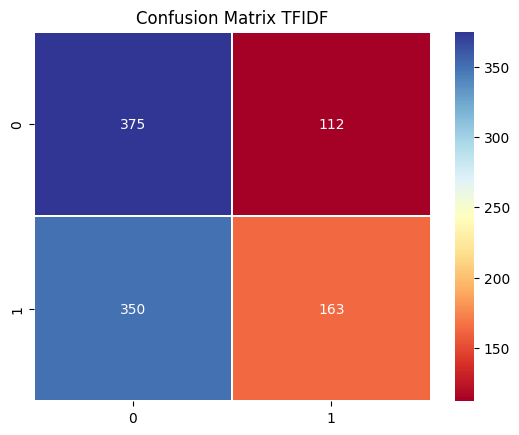

In [52]:
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,sgd_tfidf_predict,labels=[1,0])
sns.heatmap(cm_tfidf,cmap="RdYlBu",annot=True,fmt='',linewidths=0.3)
plt.title("Confusion Matrix TFIDF")

######Multinomial Naive Bayes

**Multinomial Naive Bayes for bag of words and tfidf features**

In [53]:
#training the model
mnb1=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb1.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb2=MultinomialNB()
mnb_tfidf=mnb2.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Model performance on test data**

In [54]:
#Predicting the model for bag of words
mnb_bow_predict =mnb_bow.predict(cv_test_reviews)
mnb_bow_train = mnb_bow.predict(cv_train_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb_tfidf.predict(tv_test_reviews)
mnb_tfidf_train = mnb_tfidf.predict(tv_train_reviews)
print(mnb_tfidf_predict)

[1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1
 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1
 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0
 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0
 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1
 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0
 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 0 0 1 1 0 0 0 0 1 

**Accuracy of the model**

In [55]:
# train data
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(train_sentiments,mnb_bow_train)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(train_sentiments,mnb_tfidf_train)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.99025
mnb_tfidf_score : 0.99025


In [56]:
# test data
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.538
mnb_tfidf_score : 0.537


**Print the classification report**

In [57]:
#Classification report for bag of words
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.58      0.36      0.45       513
    Negative       0.52      0.72      0.60       487

    accuracy                           0.54      1000
   macro avg       0.55      0.54      0.53      1000
weighted avg       0.55      0.54      0.52      1000

              precision    recall  f1-score   support

    Positive       0.59      0.32      0.41       513
    Negative       0.52      0.77      0.62       487

    accuracy                           0.54      1000
   macro avg       0.55      0.54      0.52      1000
weighted avg       0.55      0.54      0.51      1000



**Plot the confusion matrix**

Text(0.5, 1.0, 'Confusion Matrix BOW')

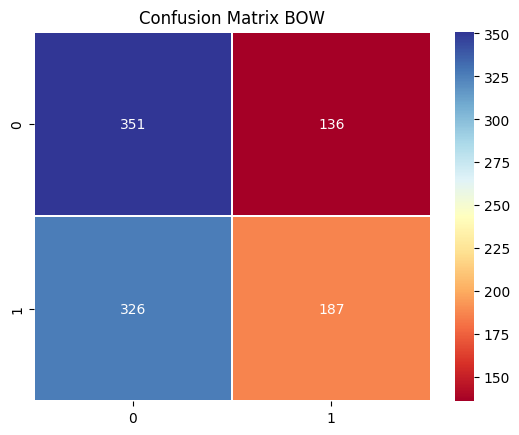

In [58]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
sns.heatmap(cm_bow,cmap="RdYlBu",annot=True,fmt='',linewidths=0.3)
plt.title("Confusion Matrix BOW")

Text(0.5, 1.0, 'Confusion Matrix TFIDF')

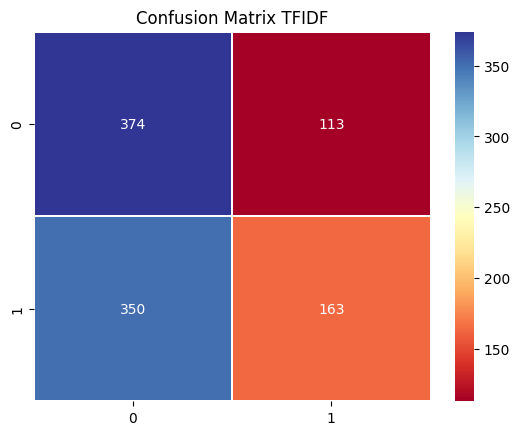

In [59]:
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
sns.heatmap(cm_tfidf,cmap="RdYlBu",annot=True,fmt='',linewidths=0.3)
plt.title("Confusion Matrix TFIDF")

#####Deep Learning Model

###### LSTM Model

In [60]:
from keras.layers import Dense, LSTM, Embedding

In [61]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X)
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=12)

In [62]:
# build LSTM model
# Xây dựng mô hình LSTM
LSTM_model = Sequential()
LSTM_model.add(Embedding(10000, 128))
LSTM_model.add(LSTM(128))
LSTM_model.add(Dense(1, activation='sigmoid'))

In [63]:
# trainning with BOW vector
LSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
LSTM_model_history = LSTM_model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
100/100 [==============================] - 11s 65ms/step - loss: 0.6625 - accuracy: 0.6019 - val_loss: 0.6004 - val_accuracy: 0.6662
Epoch 2/20
100/100 [==============================] - 2s 22ms/step - loss: 0.4066 - accuracy: 0.8309 - val_loss: 0.6158 - val_accuracy: 0.7063
Epoch 3/20
100/100 [==============================] - 2s 19ms/step - loss: 0.1824 - accuracy: 0.9322 - val_loss: 0.7666 - val_accuracy: 0.6900
Epoch 4/20
100/100 [==============================] - 1s 10ms/step - loss: 0.0831 - accuracy: 0.9722 - val_loss: 0.8948 - val_accuracy: 0.6837
Epoch 5/20
100/100 [==============================] - 1s 7ms/step - loss: 0.0456 - accuracy: 0.9856 - val_loss: 1.1996 - val_accuracy: 0.6875
Epoch 6/20
100/100 [==============================] - 1s 7ms/step - loss: 0.0267 - accuracy: 0.9912 - val_loss: 1.3003 - val_accuracy: 0.6862
Epoch 7/20
100/100 [==============================] - 1s 8ms/step - loss: 0.0185 - accuracy: 0.9934 - val_loss: 1.2316 - val_accuracy: 0.6862
E

In [64]:
LSTM_score = LSTM_model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", LSTM_score[1])

32/32 [==============================] - 1s 4ms/step - loss: 2.3989 - accuracy: 0.6370
Test Accuracy: 0.6370000243186951


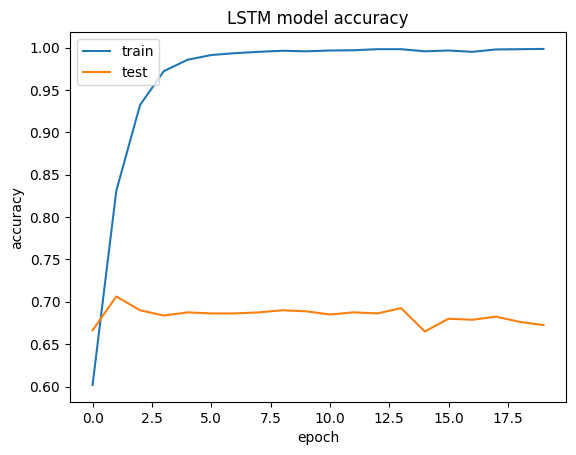

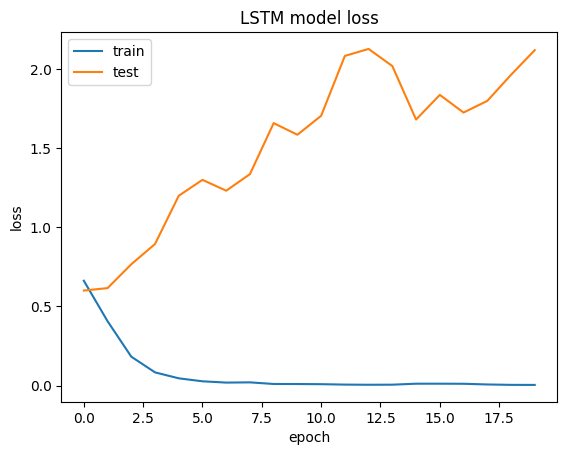

In [65]:
plt.plot(LSTM_model_history.history['accuracy'])
plt.plot(LSTM_model_history.history['val_accuracy'])

plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(LSTM_model_history.history['loss'])
plt.plot(LSTM_model_history.history['val_loss'])

plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

###### CNN Model

In [66]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense

In [67]:
# Create a CNN model
# Create a CNN model
CNN_model = Sequential()
CNN_model.add(Embedding(5000, 128))
CNN_model.add(Conv1D(128, 5, activation='relu'))
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Conv1D(128, 5, activation='relu'))
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Dense(1, activation='sigmoid'))


In [68]:
# train
CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
CNN_model_history = CNN_model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
100/100 [==============================] - 12s 68ms/step - loss: 0.6936 - accuracy: 0.5095 - val_loss: 0.6890 - val_accuracy: 0.5633
Epoch 2/20
100/100 [==============================] - 2s 21ms/step - loss: 0.6478 - accuracy: 0.5962 - val_loss: 0.6623 - val_accuracy: 0.6042
Epoch 3/20
100/100 [==============================] - 1s 13ms/step - loss: 0.5321 - accuracy: 0.6658 - val_loss: 0.7110 - val_accuracy: 0.5483
Epoch 4/20
100/100 [==============================] - 1s 12ms/step - loss: 0.4529 - accuracy: 0.7020 - val_loss: 0.8029 - val_accuracy: 0.5479
Epoch 5/20
100/100 [==============================] - 3s 33ms/step - loss: 0.4075 - accuracy: 0.7293 - val_loss: 0.9163 - val_accuracy: 0.5492
Epoch 6/20
100/100 [==============================] - 2s 21ms/step - loss: 0.3833 - accuracy: 0.7356 - val_loss: 1.0680 - val_accuracy: 0.5329
Epoch 7/20
100/100 [==============================] - 1s 12ms/step - loss: 0.3707 - accuracy: 0.7482 - val_loss: 1.1539 - val_accuracy: 0.545

In [69]:
CNN_score = CNN_model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", CNN_score[1])

32/32 [==============================] - 0s 6ms/step - loss: 1.8290 - accuracy: 0.5530
Test Accuracy: 0.5530000329017639


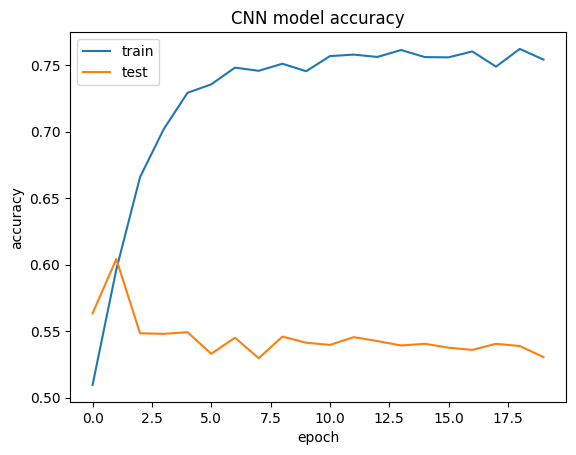

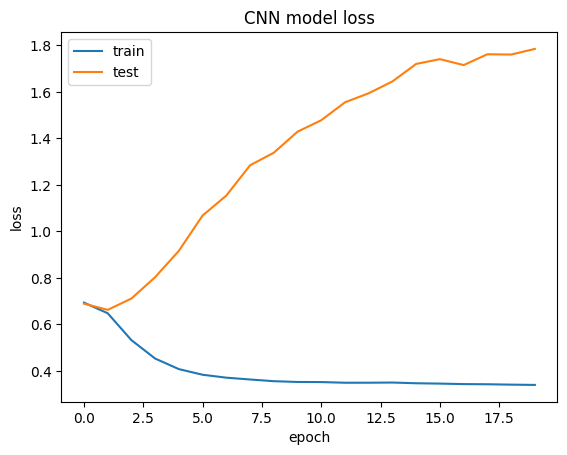

In [70]:
plt.plot(CNN_model_history.history['accuracy'])
plt.plot(CNN_model_history.history['val_accuracy'])

plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(CNN_model_history.history['loss'])
plt.plot(CNN_model_history.history['val_loss'])

plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()